<a href="https://colab.research.google.com/github/nsbssnmw/dkdkd/blob/main/FMIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러옵니다.
fashion_mnist = keras.datasets.fashion_mnist
(X_train,y_train ), (X_test,y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



# 컨볼루션 신경망의 설정
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./fashion_MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.01, epochs=10, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.33625, saving model to ./fashion_MNIST_CNN.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.33625 to 0.29147, saving model to ./fashion_MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.29147 to 0.24688, saving model to ./fashion_MNIST_CNN.hdf5

Epoch 4: val_loss did not improve from 0.24688

Epoch 5: val_loss improved from 0.24688 to 0.24338, saving model to ./fashion_MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.24338 to 0.23276, saving model to ./fashion_MNIST_CNN.hdf5

Epoch 7: val_loss did not improve from 0.23276

Epoch 8: val_loss improved from 0.23276 to 0.21988, saving model to ./fashion_MNIST_CNN.hdf5

Epoch 9: val_loss improved from 0.21988 to 0.21499, saving model to ./fashion_MNIST_CNN.hdf5

Epoch 10: val_loss did not improve from 0.21499
313/313 [==============================] - 2s 6ms/step - loss: 0.2183 - accuracy: 0.9201

 Test Accuracy: 0.9201


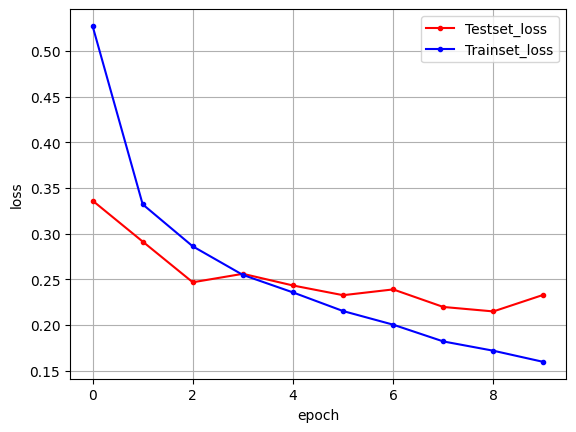

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()